# Titanic: Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew (32.5% survival).

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Import Required Libraries and Set Defaults

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve

In [2]:
sns.set(style='whitegrid')

## Load and Inspect Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combined = [train, test]

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Clean and Prepare Data

In [7]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

combined = [train, test]

In [8]:
for dataset in combined:
    dataset['Cabin'] = dataset['Cabin'].fillna('U')
    dataset['Cabin'] = dataset.Cabin.str.extract('([A-Za-z])', expand=False)
    
for dataset in combined:
    dataset['Cabin'] = dataset['Cabin'].map({'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'T':0, 'U':1}).astype(int)

In [9]:
for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
    
royalty = ['Sir', 'Countess', 'Lady', 'Jonkheer', 'Dona', 'Don']
officer = ['Col', 'Major', 'Capt', 'Rev']
    
for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(royalty, 'Royalty')
    dataset['Title'] = dataset['Title'].replace(officer, 'Officer')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset.loc[(dataset.Sex=='male') & (dataset.Title=='Dr'), 'Title'] = 'Mr'
    dataset.loc[(dataset.Sex=='female') & (dataset.Title=='Dr'), 'Title'] = 'Mrs'
    
#train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

title = {'Mrs':1, 'Miss':2, 'Royalty':3, 'Master':4, 'Officer':5, 'Mr':6}

for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title)
    dataset['Title'] = dataset['Title'].fillna(0)

In [10]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combined = [train, test]

In [11]:
for dataset in combined:
    dataset.loc[(dataset.Age < 16), 'Sex'] = 'child'
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map({'male':1, 'female':2, 'child':3}).astype(int)

In [12]:
for dataset in combined:
    dataset['Age'] = dataset.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean())).astype(int)

train['Agegroup'] = pd.cut(train['Age'], 5)
train[['Agegroup', 'Survived']].groupby(['Agegroup'], as_index=False).mean().sort_values(by='Agegroup', ascending=True)

,Agegroup,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.339506
2,"(32.0, 48.0]",0.404444
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [13]:
for dataset in combined:
    dataset.loc[(dataset.Age <= 16), 'Age'] = 1
    dataset.loc[(dataset.Age > 16) & (dataset.Age <= 32), 'Age'] = 2
    dataset.loc[(dataset.Age > 32) & (dataset.Age <= 48), 'Age'] = 3
    dataset.loc[(dataset.Age > 48) & (dataset.Age <= 64), 'Age'] = 4
    dataset.loc[(dataset.Age > 64), 'Age'] = 5
    
train = train.drop(['Agegroup'], axis=1)
combined = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,1,2,1,0,7.2500,1,S,6
1,1,1,2,3,1,0,71.2833,0,C,1
2,1,3,2,2,0,0,7.9250,1,S,2
3,1,1,2,3,1,0,53.1000,0,S,1
4,0,3,1,3,0,0,8.0500,1,S,6


In [14]:
for dataset in combined:
    dataset['FamSize'] = dataset['SibSp'] + dataset['Parch'] + 1

for dataset in combined:
    dataset['IsAlone'] = 0
    dataset.loc[(dataset.FamSize == 1), 'IsAlone'] = 1
    dataset.loc[(dataset.FamSize > 4), 'IsAlone'] = 2
    
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

train = train.drop(['Parch', 'SibSp', 'FamSize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamSize'], axis=1)
combined = [train, test]
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,1,2,7.2500,1,S,6,0
1,1,1,2,3,71.2833,0,C,1,0
2,1,3,2,2,7.9250,1,S,2,1
3,1,1,2,3,53.1000,0,S,1,0
4,0,3,1,3,8.0500,1,S,6,1
5,0,3,1,2,8.4583,1,Q,6,1
6,0,1,1,4,51.8625,0,S,6,1
7,0,3,3,1,21.0750,1,S,4,2
8,1,3,2,2,11.1333,1,S,1,0
9,1,2,3,1,30.0708,1,C,1,0


In [15]:
for dataset in combined:
    dataset['Age*Class'] = dataset['Age'] * dataset['Pclass']
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,0,3,1,2,7.2500,1,S,6,0,6
1,1,1,2,3,71.2833,0,C,1,0,3
2,1,3,2,2,7.9250,1,S,2,1,6
3,1,1,2,3,53.1000,0,S,1,0,3
4,0,3,1,3,8.0500,1,S,6,1,9
5,0,3,1,2,8.4583,1,Q,6,1,6
6,0,1,1,4,51.8625,0,S,6,1,4
7,0,3,3,1,21.0750,1,S,4,2,3
8,1,3,2,2,11.1333,1,S,1,0,6
9,1,2,3,1,30.0708,1,C,1,0,2


In [16]:
freq_port = train['Embarked'].mode()[0]

for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map({'S':1, 'C':2, 'Q':3}).astype(int)
    
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,0,3,1,2,7.2500,1,1,6,0,6
1,1,1,2,3,71.2833,0,2,1,0,3
2,1,3,2,2,7.9250,1,1,2,1,6
3,1,1,2,3,53.1000,0,1,1,0,3
4,0,3,1,3,8.0500,1,1,6,1,9
5,0,3,1,2,8.4583,1,3,6,1,6
6,0,1,1,4,51.8625,0,1,6,1,4
7,0,3,3,1,21.0750,1,1,4,2,3
8,1,3,2,2,11.1333,1,1,1,0,6
9,1,2,3,1,30.0708,1,2,1,0,2


In [17]:
for dataset in combined:
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)
        
train['FareGroup'] = pd.qcut(train['Fare'], 4)
train[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='Survived', ascending=True)

for dataset in combined:
    dataset.loc[(dataset.Fare <= 7.91), 'Fare'] = 1
    dataset.loc[(dataset.Fare > 7.91) & (dataset.Fare <= 14.454), 'Fare'] = 2
    dataset.loc[(dataset.Fare > 14.454) & (dataset.Fare <= 31.0), 'Fare'] = 3
    dataset.loc[(dataset.Fare > 31.0), 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train = train.drop(['FareGroup'], axis=1)
combined = [train, test]
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,0,3,1,2,1,1,1,6,0,6
1,1,1,2,3,4,0,2,1,0,3
2,1,3,2,2,2,1,1,2,1,6
3,1,1,2,3,4,0,1,1,0,3
4,0,3,1,3,2,1,1,6,1,9
5,0,3,1,2,2,1,3,6,1,6
6,0,1,1,4,4,0,1,6,1,4
7,0,3,3,1,3,1,1,4,2,3
8,1,3,2,2,2,1,1,1,0,6
9,1,2,3,1,3,1,2,1,0,2


In [18]:
train.describe()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.490460,2.332211,2.505051,0.771044,1.361392,4.337823,0.741863,5.094276
std,0.486592,0.836071,0.660838,0.822210,1.118148,0.420397,0.635673,2.090459,0.575364,2.152104
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,2.000000,1.500000,1.000000,1.000000,2.000000,0.000000,3.000000
50%,0.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,6.000000,1.000000,6.000000
75%,1.000000,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000,6.000000,1.000000,6.000000
max,1.000000,3.000000,3.000000,5.000000,4.000000,1.000000,3.000000,6.000000,2.000000,15.000000


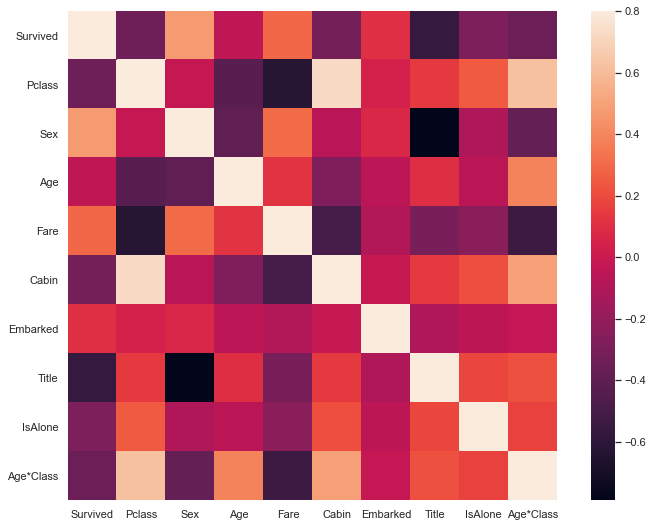

In [19]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr(), vmax=0.8, square=True)

## Learning Model

In [20]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1).copy()

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [21]:
def grid_search_model(X, Y, model, parameters, cv):
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=cv)
    CV_model.fit(X, Y)
    CV_model.cv_results_
    print('Best score: ', CV_model.best_score_,' / Best parameters :', CV_model.best_params_)

In [22]:
#validation curve
def validation_curve_model(X, Y, model, param_name, parameters, cv, ylim, log=True):

    train_scores, test_scores = validation_curve(model, X, Y, param_name=param_name, param_range=parameters,cv=cv, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Validation curve")
    plt.fill_between(parameters, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameters, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")

    if log==True:
        plt.semilogx(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.semilogx(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    else:
        plt.plot(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.plot(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    #plt.ylim([0.55, 0.9])
    if ylim is not None:
        plt.ylim(*ylim)

    plt.ylabel('Score')
    plt.xlabel('Parameter C')
    plt.legend(loc="best")
    
    return plt

In [23]:
# Learning curve
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt

In [24]:
# learning, prediction and printing results
def predict_model(X, Y, model, Xtest, submit_name):
    model.fit(X, Y)
    Y_pred  = model.predict(Xtest)
    score   = cross_val_score(model, X, Y, cv=cv)

    submission = pd.DataFrame({
            "PassengerId": test["PassengerId"],
            "Survived": Y_pred
        })
    submission.to_csv(submit_name, index=False)
    
    return score 

### Logistic Regression

In [25]:
search_param = 1
plot_vc = 1
plot_lc = 1

In [26]:
model = LogisticRegression(max_iter=500)
if search_param == 1:
    param_range = np.logspace(-6, 5, 12)
    param_grid = dict(C=param_range)
    grid_search_model(X_train, Y_train, model, param_grid, cv)

Best score:  0.8246368715083798  / Best parameters : {'C': 100.0}


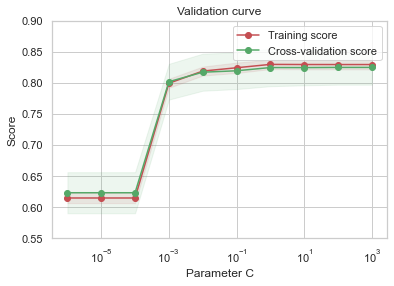

In [27]:
#Validation Curve: Logistic Regression
if plot_vc == 1:
    param_range = np.logspace(-6, 3, 10)
    param_name="C"
    ylim=[0.55, 0.9]
    validation_curve_model(X_train, Y_train, model, "C", param_range, cv, ylim)

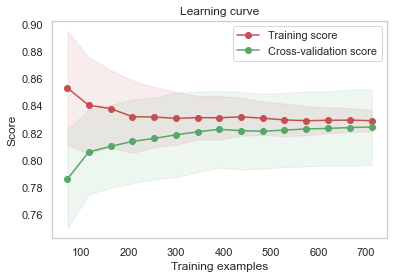

In [28]:
#learn curve
logreg  = LogisticRegression(C=1000)

if plot_lc==1:
    train_size=np.linspace(.1, 1.0, 15)
    Learning_curve_model(X_train, Y_train, logreg, cv, train_size)

In [29]:
acc_log = predict_model(X_train, Y_train, logreg, X_test, 'submission_logreg.csv')

### Support Vector Machines

In [30]:
search_param = 0
plot_vc = 0
plot_lc = 1

In [31]:
#grid search: SVM
search_param = 0
if search_param==1:
    param_range = np.linspace(0.5, 5, 9)
    param_grid = dict(C=param_range)

    grid_search_model(X_train, Y_train, SVC(), param_grid, cv)

In [32]:
#Validation Curve: SVC
if plot_vc == 1:
    param_range = np.linspace(0.1, 10, 10)
    param_name="C"
    ylim=[0.78, 0.90]
    validation_curve_model(X_train, Y_train, SVC(), "C", param_range, cv, ylim, log=False)

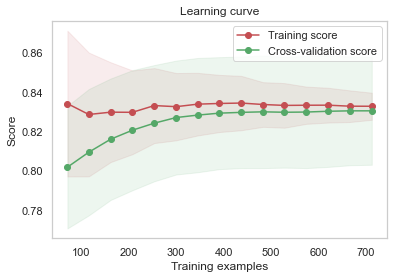

In [33]:
#learn curve: SVC
svc = SVC(C=1, probability=True)

if plot_lc == 1:
    train_size=np.linspace(.1, 1.0, 15)
    Learning_curve_model(X_train, Y_train, svc, cv, train_size)

In [34]:
acc_svc = predict_model(X_train, Y_train, svc, X_test, 'submission_svm.csv')

### K Nearest Neighbours

In [35]:
search_param = 0
plot_vc = 0
plot_lc = 1

In [36]:
#grid search: KNN
if search_param==1:
    param_range = (np.linspace(1, 10, 10)).astype(int)
    param_grid = dict(n_neighbors=param_range)

    grid_search_model(X_train, Y_train, KNeighborsClassifier(), param_grid, cv)

In [37]:
#Validation Curve: KNN
if plot_vc==1:
    param_range = np.linspace(2, 20, 10).astype(int)
    param_name="n_neighbors"
    ylim=[0.75, 0.90]
    validation_curve_model(X_train, Y_train, KNeighborsClassifier(), "n_neighbors", param_range, cv, ylim, log=False)

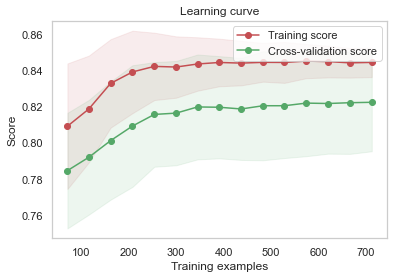

In [38]:
#learn curve: KNN
knn = KNeighborsClassifier(n_neighbors = 10)

if plot_lc==1:
    train_size=np.linspace(.1, 1.0, 15)
    Learning_curve_model(X_train, Y_train, knn, cv, train_size)

In [39]:
acc_knn = predict_model(X_train, Y_train, knn, X_test, 'submission_knn.csv')

### Naive Bayes

In [40]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
acc_gaussian = predict_model(X_train, Y_train, gaussian, X_test, 'submission_gnb.csv')

### Perceptron

In [41]:
#Perceptron
perceptron = Perceptron()
acc_perceptron = predict_model(X_train, Y_train, perceptron, X_test, 'submission_perceptron.csv')

### Stochastic Gradient Descent

In [42]:
#Stochastic Gradient Descent
sgd = SGDClassifier()
acc_sgd = predict_model(X_train, Y_train, sgd, X_test, 'submission_sgd.csv')

### Decision Tree

In [43]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
acc_decision_tree = predict_model(X_train, Y_train, decision_tree, X_test, 'submission_dectree.csv')

### Random Forest

In [44]:
search_param = 0
plot_vc = 0
plot_lc = 1

In [45]:
if plot_vc==1:
    param_range = np.linspace(10, 110, 10).astype(int)
    ylim=[0.75, 0.90]
    validation_curve_model(X_train, Y_train, RandomForestClassifier(min_samples_leaf=12),
                           "n_estimators", param_range, cv, ylim, log=False)

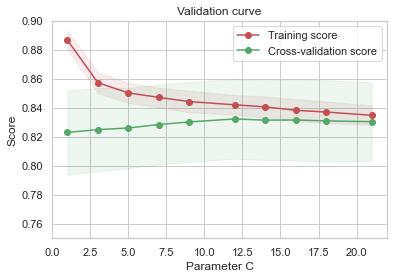

In [46]:
if plot_lc==1:
    param_range = np.linspace(1, 21, 10).astype(int)
    ylim=[0.75, 0.90]
    validation_curve_model(X_train, Y_train, RandomForestClassifier(n_estimators=80),
                           "min_samples_leaf", param_range, cv, ylim, log=False)

In [ ]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=80, random_state =0, min_samples_leaf = 12)
acc_random_forest = predict_model(X_train, Y_train, random_forest, X_test, 'submission_random_forest.csv')

### Ensemble Voting

In [ ]:
#Ensemble Voting
ensemble_voting = VotingClassifier(estimators=[('lg', logreg), ('sv', svc),
                                               ('rf', random_forest),('kn',knn)], voting='soft')
acc_ensemble_voting = predict_model(X_train, Y_train, ensemble_voting, X_test,
                                    'submission_ensemble_voting.csv')

In [ ]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
                                'Random Forest', 'Naive Bayes', 'Perceptron',
                                'Stochastic Gradient Decent',
                                'Decision Tree', 'ensemble_voting'],'KFoldScore': [acc_svc.mean(), acc_knn.mean(), acc_log.mean(),
                                acc_random_forest.mean(), acc_gaussian.mean(), acc_perceptron.mean(),
                                acc_sgd.mean(), acc_decision_tree.mean(), acc_ensemble_voting.mean()],
                                'Std': [acc_svc.std(), acc_knn.std(), acc_log.std(),
                                acc_random_forest.std(), acc_gaussian.std(), acc_perceptron.std(),
                                acc_sgd.std(), acc_decision_tree.std(), acc_ensemble_voting.std()]})

models.sort_values(by='KFoldScore', ascending=False)